In [30]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [31]:
# Target User
target_users = ("APTA_Transit", "BART", "MTA", "CTA", "MARTA", "RTC")

# Tweet Texts
tweet_texts = []
tweet_date = []

#variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counter_list = []
target_list = []


for target in target_users:
    #Counter
    counter = 1
    # Create a loop to iteratively run API requests
    for x in range(1, 6):

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Print Tweet
            #print(tweet["text"])

            # Store Tweet in Array
            tweet_texts.append(tweet["text"])

            # Store Tweet Date in Array
            tweet_date.append(tweet["created_at"])

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            counter_list.append(counter)
            target_list.append(target)
            # Store the data in dictionary
            sentiment = {
                "User": target_list,
                "Tweet": tweet_texts,
                "Date": tweet_date,
                "Compound": compound_list,
                "Positive": positive_list,
                "Neutral": negative_list,
                "Negative": neutral_list,
                "Tweets Ago": counter_list
            }
            #add to counter
            #print(target)
            counter += 1
        


In [32]:
#df = pd.DataFrame(sentiment)
sentiment_df = pd.DataFrame(sentiment)
sentiment_df.head(200)

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago,User
0,0.8553,Wed Apr 11 21:22:08 +0000 2018,0.516,0.000,0.484,Congratulations to @RideKCTransit on their new...,1,APTA_Transit
1,0.0000,Tue Apr 10 21:36:02 +0000 2018,1.000,0.000,0.000,"RT @APTA_info: “In late March, Congress approp...",2,APTA_Transit
2,0.7717,Tue Apr 10 13:23:30 +0000 2018,0.675,0.000,0.325,Public transportation supports jobs in more wa...,3,APTA_Transit
3,0.0000,Mon Apr 09 21:03:27 +0000 2018,1.000,0.000,0.000,https://t.co/iNuedb2jYw,4,APTA_Transit
4,0.0000,Fri Apr 06 21:21:35 +0000 2018,1.000,0.000,0.000,https://t.co/zxMKT7Ulqs,5,APTA_Transit
5,0.4588,Thu Apr 05 18:59:20 +0000 2018,0.870,0.000,0.130,We applaud Congress for standing up for public...,6,APTA_Transit
6,0.7003,Wed Apr 04 20:59:16 +0000 2018,0.734,0.000,0.266,#Publictransportation has long operated in com...,7,APTA_Transit
7,0.4199,Tue Apr 03 16:30:17 +0000 2018,0.823,0.000,0.177,#PublicTransit keeps America moving! Our publi...,8,APTA_Transit
8,0.0000,Mon Apr 02 21:26:03 +0000 2018,1.000,0.000,0.000,https://t.co/1OBAhsKXmk,9,APTA_Transit
9,0.2732,Fri Mar 30 19:15:13 +0000 2018,0.884,0.000,0.116,DYK: Every $10 million in capital investment i...,10,APTA_Transit


In [33]:
#show data is coming into dataframe correctly and print
sentiment_df.head(110)
sentiment_df.to_csv('sentiment_df.csv')



In [34]:
#Using Pandas create dataframes for each media company
#target_users = ("APTA_Transit", "BART", "MTA", "CTA", "MARTA", "RTC")
apta_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'APTA_Transit']
bart_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'BART']
mta_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'MTA']
cta_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'CTA']
marta_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'MARTA']
rtc_sentiment_df = sentiment_df.loc[sentiment_df['User'] == 'RTC']

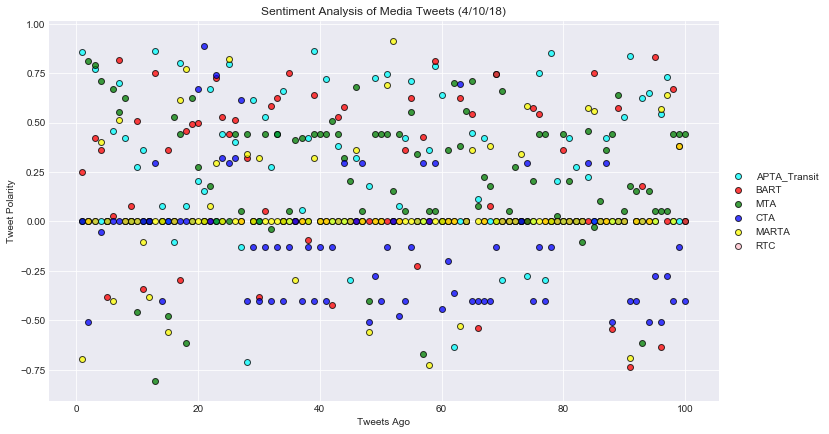

In [56]:
#Plot for Sentiment Analysis
#set seadboard style & size of plot
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

#--------plot BBC ------------#
urban_plot = plt.scatter(apta_sentiment_df['Tweets Ago'], apta_sentiment_df['Compound'],  facecolors="cyan", edgecolors="black",
            alpha=0.75)

#--------plot CNN ------------#
urban_plot = plt.scatter(bart_sentiment_df['Tweets Ago'], bart_sentiment_df['Compound'],  facecolors="red", edgecolors="black",
            alpha=0.75)

#--------plot CBS ------------#
urban_plot = plt.scatter(mta_sentiment_df['Tweets Ago'], mta_sentiment_df['Compound'],  facecolors="green", edgecolors="black",
            alpha=0.75)

#--------plot FOX ------------#
urban_plot = plt.scatter(cta_sentiment_df['Tweets Ago'], cta_sentiment_df['Compound'],  facecolors="blue", edgecolors="black",
            alpha=0.75)

#--------plot NYTIMES ------------#
urban_plot = plt.scatter(marta_sentiment_df['Tweets Ago'], marta_sentiment_df['Compound'],  facecolors="yellow", edgecolors="black",
            alpha=0.75)

#--------plot NYTIMES ------------#
urban_plot = plt.scatter(rtc_sentiment_df['Tweets Ago'], rtc_sentiment_df['Compound'],  facecolors="pink", edgecolors="black",
            alpha=0.75)

#Titles and axis'
plt.title("Sentiment Analysis of Media Tweets (4/10/18)")
plt.xlabel("Tweets Ago")
labels = ["APTA_Transit", "BART", "MTA", "CTA", "MARTA", "RTC"]
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
#plt.xlim([-180,180])
plt.ylabel("Tweet Polarity")
plt.savefig("Sentiment_Scatter_Plot_4-10-18.png")

plt.show()

#---------Analysis- OBSERVABLE TRENDS-------#
#1 - CBS Media looks to be overly positive in most of their tweets.
#2 - CNN looks to be the most sporadic with their tweets going across the board from positive to negative.
    # very evident by their news broadcasting as well.
#3 -  The BBC has the most neutral compounded score from the group.

In [55]:
#Average the compound vader analysis for each broadcasting company
apta_compound_avg = (f"{np.mean(apta_sentiment_df['Compound']):.3f}")
bart_compound_avg = (f"{np.mean(bart_sentiment_df['Compound']):.3f}")
mta_compound_avg = (f"{np.mean(mta_sentiment_df['Compound']):.3f}")
cta_compound_avg = (f"{np.mean(cta_sentiment_df['Compound']):.3f}")
marta_compound_avg = (f"{np.mean(marta_sentiment_df['Compound']):.3f}")
rtc_compound_avg = (f"{np.mean(rtc_sentiment_df['Compound']):.3f}")

#create DF with all compounded averages
public_transit = {"DC (APTA)" : [apta_compound_avg], "SF (BART)" : [bart_compound_avg], "NYC (MTA)" : [mta_compound_avg], "CHI (CTA)": [cta_compound_avg], \
                  "ATL (MARTA)" : [marta_compound_avg], "LV (RTC)": [rtc_compound_avg]}
compound_df = pd.DataFrame(public_transit)                  
compound_df


,ATL (MARTA),CHI (CTA),DC (APTA),LV (RTC),NYC (MTA),SF (BART)
0,0.059,-0.077,0.243,nan,0.211,0.158


['nan', 'nan', 'nan', 'nan', 'nan']